# Load Libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.externals import joblib

C:\Users\moham\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


# Load the data

In [2]:
data=pd.read_csv(r"E:\diabetes.csv")

In [3]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0


In [4]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

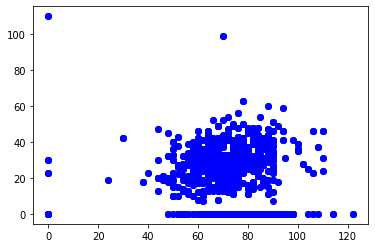

In [5]:
plt.scatter(data["BloodPressure"],data["SkinThickness"],color="blue")

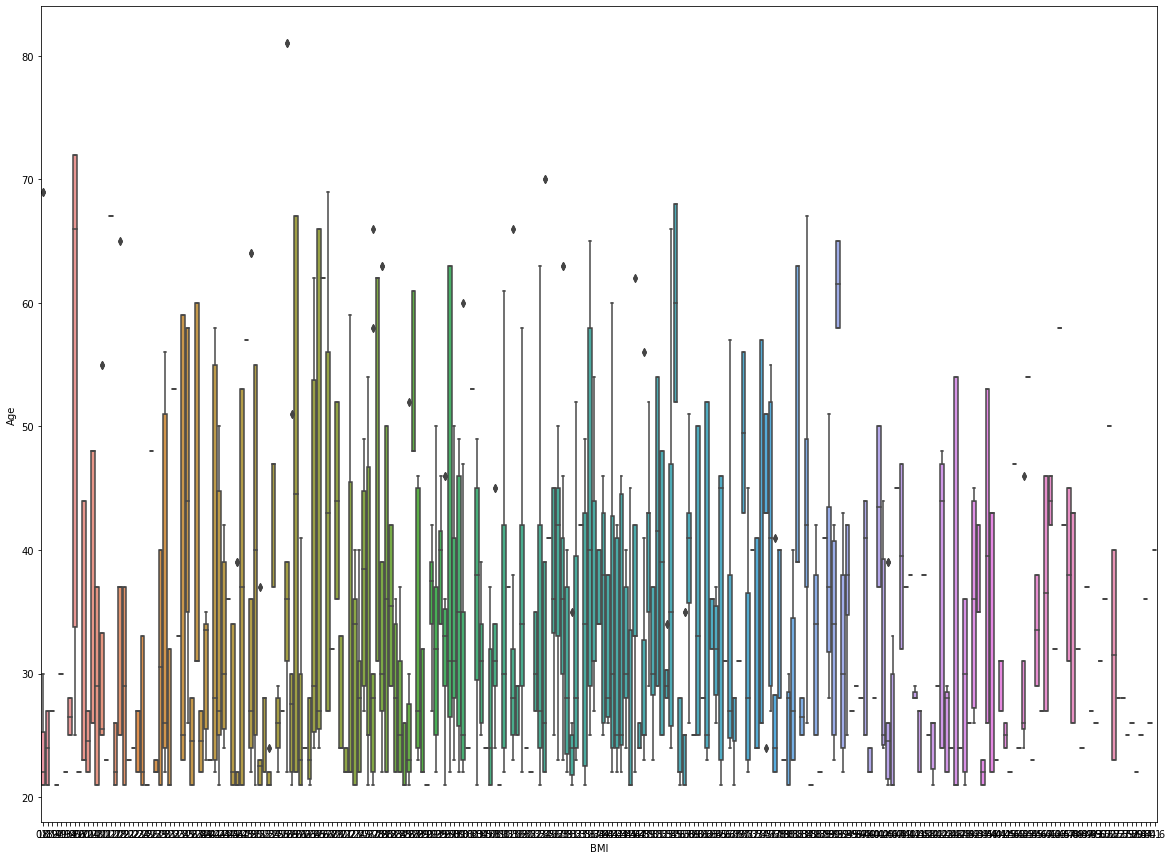

In [6]:
plt.subplots(figsize=(20,15))
sns.boxplot(x="BMI",y="Age",data=data)

In [7]:
data.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.120405,0.149672,-0.063375,-0.076600,0.019475,-0.025453,0.539457,0.224437
Glucose,0.120405,1.000000,0.138044,0.062368,0.320371,0.226864,0.123243,0.254496,0.458421
BloodPressure,0.149672,0.138044,1.000000,0.198800,0.087384,0.281545,0.051331,0.238375,0.075958
SkinThickness,-0.063375,0.062368,0.198800,1.000000,0.448859,0.393760,0.178299,-0.111034,0.076040
Insulin,-0.076600,0.320371,0.087384,0.448859,1.000000,0.223012,0.192719,-0.085879,0.120924
BMI,0.019475,0.226864,0.281545,0.393760,0.223012,1.000000,0.125719,0.038987,0.276726
DiabetesPedigreeFunction,-0.025453,0.123243,0.051331,0.178299,0.192719,0.125719,1.000000,0.026569,0.155459
Age,0.539457,0.254496,0.238375,-0.111034,-0.085879,0.038987,0.026569,1.000000,0.236509
Outcome,0.224437,0.458421,0.075958,0.076040,0.120924,0.276726,0.155459,0.236509,1.000000


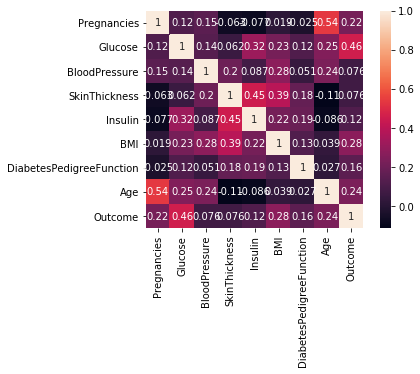

In [8]:
sns.heatmap(data.corr(), square=True,annot=True)

# Split the data

In [9]:
x,y=data.iloc[:,:-1],data.iloc[:,-1]

# Clean the data

In [10]:
x.drop(["SkinThickness"],axis=1,inplace=True)

In [11]:
x.drop(["BloodPressure"],axis=1,inplace=True)

In [12]:
x[:10]

,Pregnancies,Glucose,Insulin,BMI,DiabetesPedigreeFunction,Age
0,2,138,0,33.6,0.127,47
1,0,84,125,38.2,0.233,23
2,0,145,0,44.2,0.630,31
3,0,135,250,42.3,0.365,24
4,1,139,480,40.7,0.536,21
5,0,173,265,46.5,1.159,58
6,4,99,0,25.6,0.294,28
7,8,194,0,26.1,0.551,67
8,2,83,66,36.8,0.629,24
9,2,89,0,33.5,0.292,42


In [13]:
y

0       1
1       0
2       1
3       1
4       0
5       0
6       0
7       0
8       0
9       0
10      0
11      1
12      0
13      0
14      0
15      0
16      1
17      0
18      0
19      0
20      1
21      0
22      0
23      0
24      1
25      0
26      0
27      0
28      1
29      0
       ..
1970    0
1971    0
1972    0
1973    1
1974    0
1975    1
1976    1
1977    0
1978    0
1979    0
1980    1
1981    0
1982    0
1983    0
1984    0
1985    1
1986    1
1987    0
1988    0
1989    0
1990    0
1991    1
1992    1
1993    0
1994    0
1995    0
1996    1
1997    0
1998    1
1999    0
Name: Outcome, Length: 2000, dtype: int64

# Creating a test set and a training set

In [14]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=46,test_size=0.1,shuffle=True)

In [15]:
x_train[:5]

,Pregnancies,Glucose,Insulin,BMI,DiabetesPedigreeFunction,Age
1106,0,107,0,26.4,0.133,23
984,3,99,86,25.6,0.154,24
958,4,99,0,25.6,0.294,28
1410,2,90,55,24.4,0.249,24
1226,8,112,0,23.6,0.840,58


In [16]:
#sc=StandardScaler()

In [17]:
#x_train=sc.fit_transform(x_train)

# SGDClassifier Model

In [18]:
sgd=SGDClassifier()
sgd.fit(x_train,y_train)
sgd.score(x_train,y_train)

0.725

In [19]:
y_pred2=sgd.predict(x_test)
sgd.score(x_test,y_pred2)

1.0

In [20]:
cm2=confusion_matrix(y_test,y_pred2)
print(cm2)

[[100  33]
 [ 13  54]]


In [21]:
#sns.heatmap(cm,center=True)

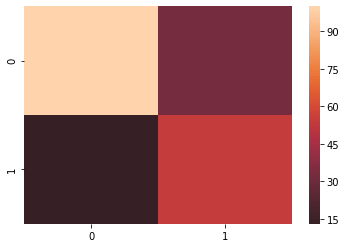

In [22]:
sns.heatmap(cm2,center=False)

# DecisionTree Model

In [23]:
for i in range (2,21):
    
    ds=DecisionTreeClassifier(criterion="gini",max_depth=i)
    ds.fit(x_train,y_train)
    ds.score(x_train,y_train)
    y_pred4=ds.predict(x_test)
    print("max_depth=",i,"accuracy=",accuracy_score(y_test,y_pred4))


max_depth= 2 accuracy= 0.81
max_depth= 3 accuracy= 0.775
max_depth= 4 accuracy= 0.78
max_depth= 5 accuracy= 0.835
max_depth= 6 accuracy= 0.855
max_depth= 7 accuracy= 0.865
max_depth= 8 accuracy= 0.88
max_depth= 9 accuracy= 0.94
max_depth= 10 accuracy= 0.955
max_depth= 11 accuracy= 0.965
max_depth= 12 accuracy= 0.98
max_depth= 13 accuracy= 0.985
max_depth= 14 accuracy= 0.985
max_depth= 15 accuracy= 0.985
max_depth= 16 accuracy= 0.985
max_depth= 17 accuracy= 0.985
max_depth= 18 accuracy= 0.985
max_depth= 19 accuracy= 0.985
max_depth= 20 accuracy= 0.985


# SVC Model

In [24]:
svc=SVC()
svc.fit(x_train,y_train)
svc.score(x_train,y_train)
y_pred3=svc.predict(x_test)
print(accuracy_score(y_test,y_pred3))

C:\Users\moham\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.99


# predict data of user

In [25]:
joblib.dump(svc,"diabetes3.joblib")

['diabetes3.joblib']

In [26]:
y_pred3=svc.predict(x_test)
svc.score(x_test,y_pred3)

1.0

In [27]:
cm3=confusion_matrix(y_test,y_pred3)

In [28]:
print(cm3)

[[133   0]
 [  2  65]]


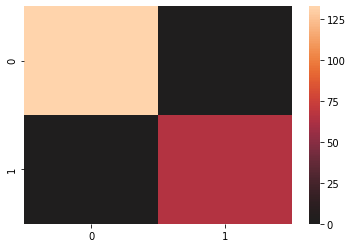

In [29]:
sns.heatmap(cm3,center=True)

In [30]:
cm4=confusion_matrix(y_test,y_pred4)
print(cm4)

[[132   1]
 [  2  65]]


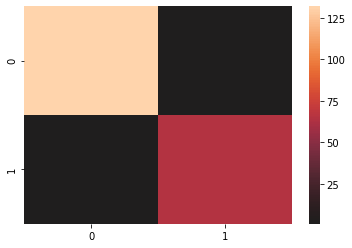

In [31]:
sns.heatmap(cm4,center=True)